In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('sentimentdataset.csv')

In [3]:
df.head(5)

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [4]:
df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)
df.head(5)

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Text       732 non-null    object 
 1   Sentiment  732 non-null    object 
 2   Timestamp  732 non-null    object 
 3   User       732 non-null    object 
 4   Platform   732 non-null    object 
 5   Hashtags   732 non-null    object 
 6   Retweets   732 non-null    float64
 7   Likes      732 non-null    float64
 8   Country    732 non-null    object 
 9   Year       732 non-null    int64  
 10  Month      732 non-null    int64  
 11  Day        732 non-null    int64  
 12  Hour       732 non-null    int64  
dtypes: float64(2), int64(4), object(7)
memory usage: 74.5+ KB


In [6]:
df.describe()

,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
std,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414
min,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000


In [7]:
df.isnull().sum()

Text         0
Sentiment    0
Timestamp    0
User         0
Platform     0
Hashtags     0
Retweets     0
Likes        0
Country      0
Year         0
Month        0
Day          0
Hour         0
dtype: int64

### Top 20 Sentiment Distribution

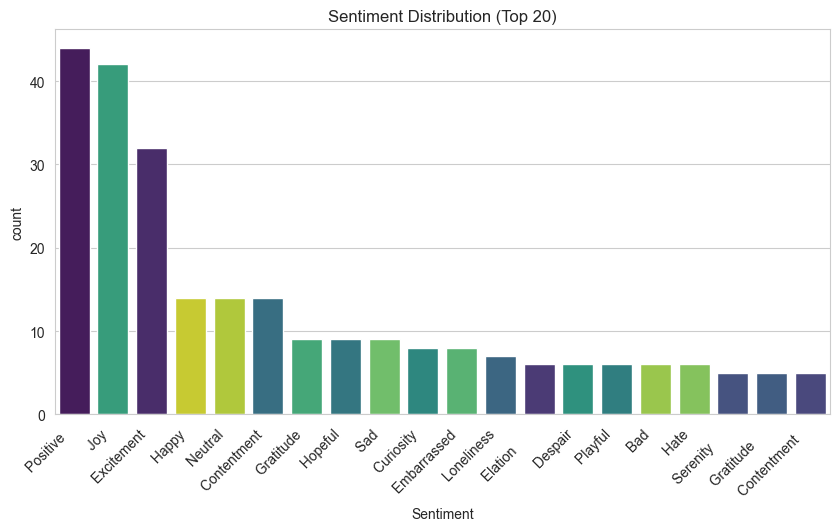

In [8]:
sns.set_style("whitegrid")

# Get the top 20 most used sentiments
top_20_sentiments = df["Sentiment"].value_counts().nlargest(20).index
filtered_df = df[df["Sentiment"].isin(top_20_sentiments)]

# Plot
plt.figure(figsize=(10, 5))
sns.countplot(data=filtered_df, x="Sentiment", hue="Sentiment", palette="viridis", order=top_20_sentiments)
plt.title("Sentiment Distribution (Top 20)")
plt.xticks(rotation=45, ha="right")

plt.show()

### Distribution of Platform

In [9]:
df['Platform'].unique()
df['Platform'] = df['Platform'].str.strip().str.capitalize()

In [10]:
df['Platform'].unique()

array(['Twitter', 'Instagram', 'Facebook'], dtype=object)

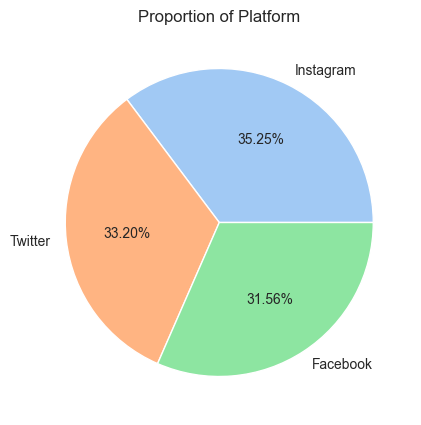

In [11]:
colors = sns.color_palette("pastel", n_colors=df['Platform'].nunique())

# Plot
plt.figure(figsize=(10, 5))
df['Platform'].value_counts().plot(kind='pie', autopct='%1.2f%%', colors=colors)
plt.title("Proportion of Platform")
plt.ylabel("")

plt.show()

### Likes per sentiment

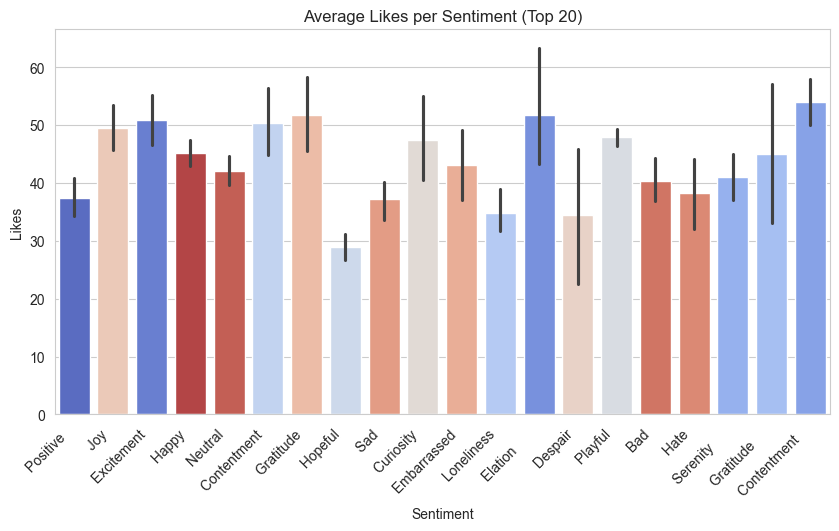

In [12]:
plt.figure(figsize=(10, 5))

sns.barplot(
    x=filtered_df["Sentiment"], 
    y=filtered_df["Likes"], 
    palette="coolwarm",
    hue= filtered_df["Sentiment"],
    order=top_20_sentiments
)
plt.title("Average Likes per Sentiment (Top 20)")
plt.xticks(rotation=45, ha="right")

plt.show()

### Correlation Heatmap between Likes and Retweet
Extremely related

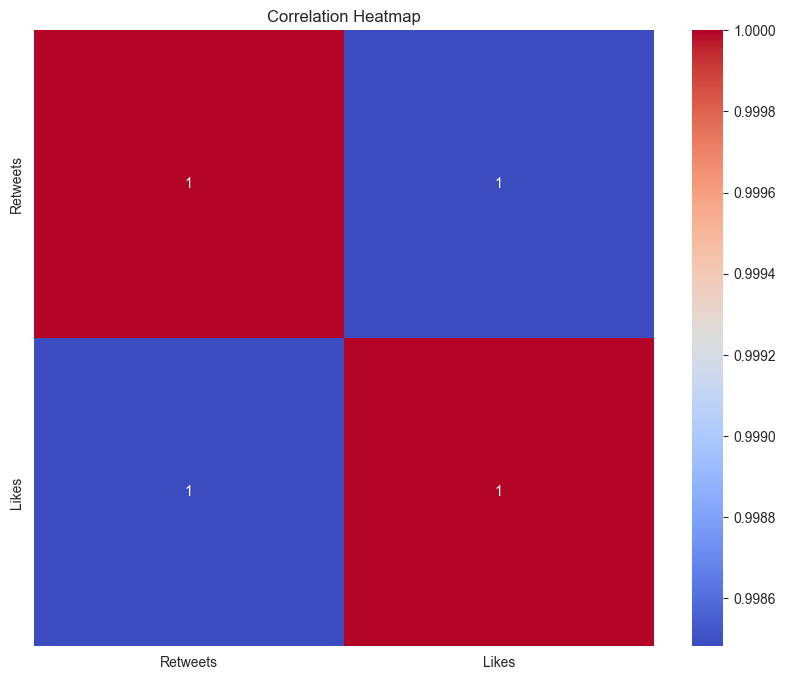

In [13]:
numeric_df = df.select_dtypes(include=[np.number])
numeric_df.drop(columns=['Year','Month','Day','Hour'],inplace=True)
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Correlation between Retweets and Likes (Top 20 sentiments)

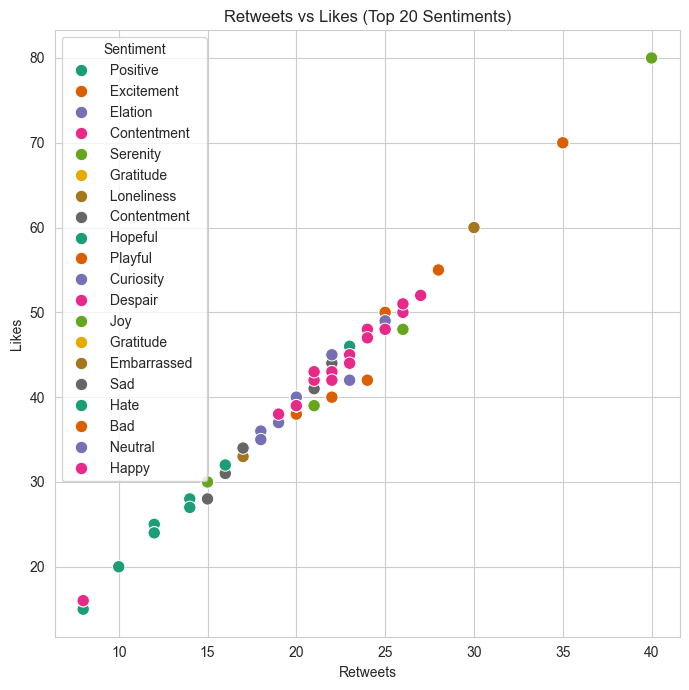

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get top 20 most common sentiments
top_20 = df['Sentiment'].value_counts().nlargest(20).index
df_top20 = df[df['Sentiment'].isin(top_20)]

# Plot
plt.figure(figsize=(7, 7))
sns.scatterplot(data=df_top20, x="Retweets", y="Likes", hue="Sentiment", palette="Dark2", s=80)
plt.title("Retweets vs Likes (Top 20 Sentiments)")
plt.tight_layout()
plt.show()


### Total Retweets and Countries

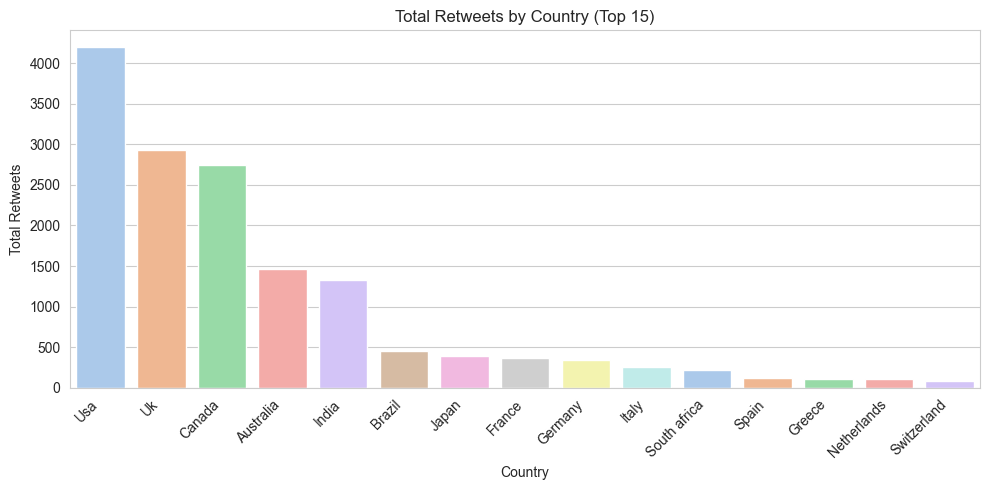

In [15]:
df['Country'] = df['Country'].str.strip().str.capitalize()
top_retweets = df.groupby('Country')['Retweets'].sum().nlargest(15).reset_index()

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=top_retweets, x='Country', y='Retweets',hue='Country', palette='pastel')
plt.title("Total Retweets by Country (Top 15)")
plt.ylabel("Total Retweets")
plt.xlabel("Country")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### Time based analysis

#### Average likes per hour

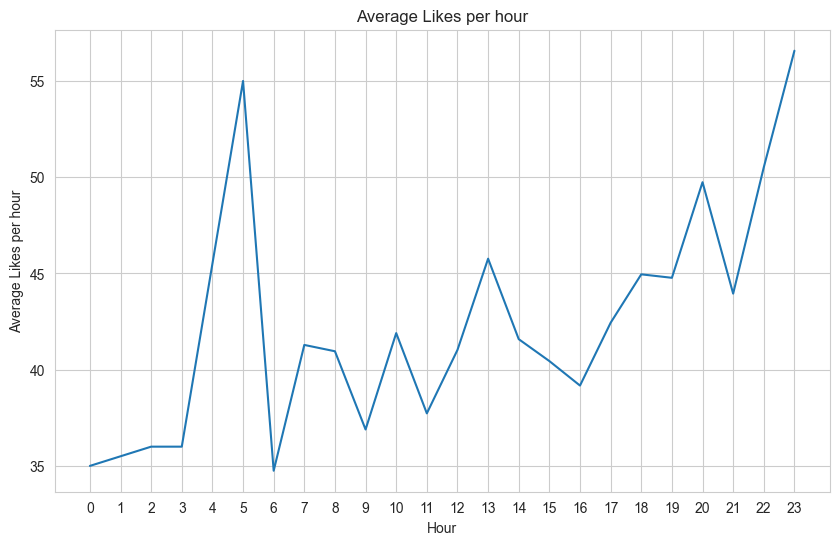

In [16]:
plt.figure(figsize=(10,6))
sns.lineplot(x=df['Hour'], y=df['Likes'], estimator='mean', errorbar=None)
plt.title("Average Likes per hour")
plt.xlabel("Hour")
plt.ylabel("Average Likes per hour")
plt.xticks(range(0, 24))
plt.show()

#### Average Retweets per hour

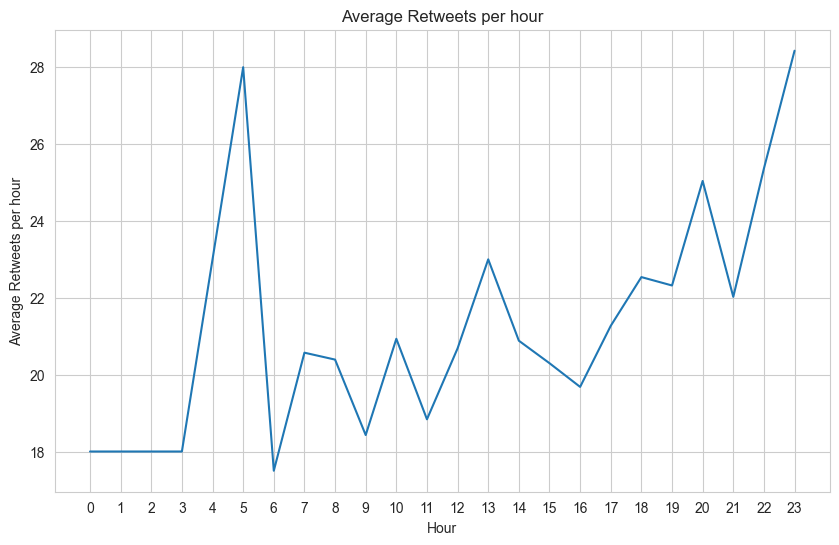

In [17]:
plt.figure(figsize=(10,6))
sns.lineplot(x=df['Hour'], y=df['Retweets'], estimator='mean', errorbar=None)
plt.title("Average Retweets per hour")
plt.xlabel("Hour")
plt.ylabel("Average Retweets per hour")
plt.xticks(range(0, 24))
plt.show()

#### Busiest hour of the day

Hour with most posts: 14:00 with 94 posts


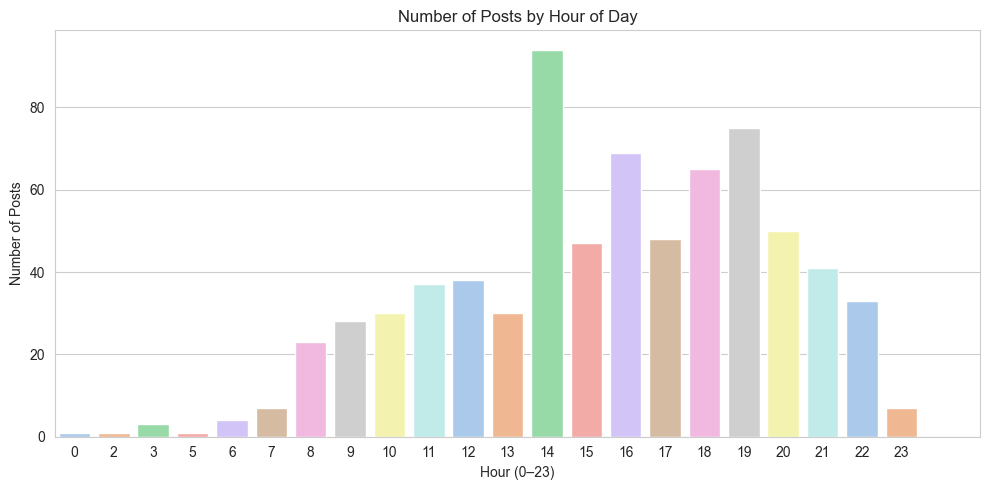

In [18]:
posts_by_hour = df['Hour'].value_counts().sort_index()

# Print top hour
busiest_hour = posts_by_hour.idxmax()
print(f"Hour with most posts: {busiest_hour}:00 with {posts_by_hour.max()} posts")

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=posts_by_hour.index, y=posts_by_hour.values,hue=posts_by_hour.index, palette="pastel", legend=False)
plt.title("Number of Posts by Hour of Day")
plt.xlabel("Hour (0–23)")
plt.ylabel("Number of Posts")
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

#### Busiest Day of the month

Day with most posts: 15 with 73 posts


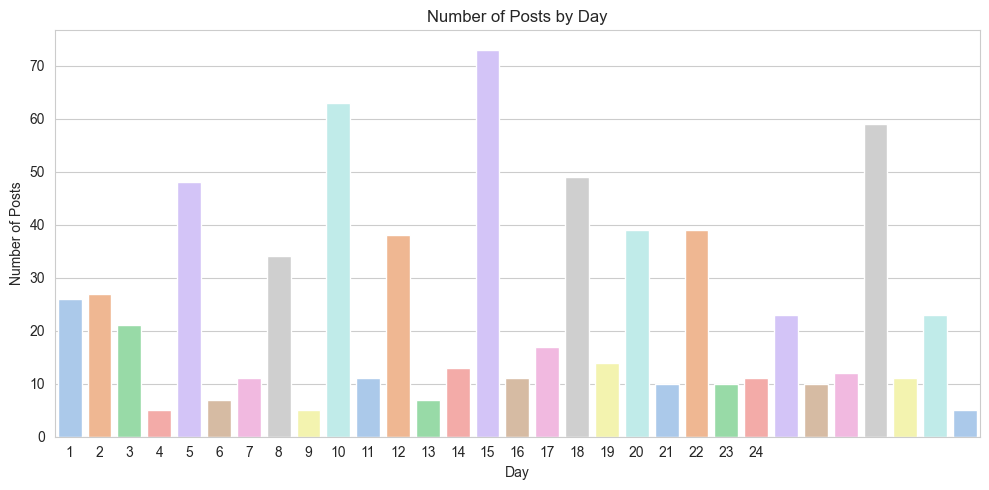

In [19]:
posts_by_day = df['Day'].value_counts().sort_index()

# Print top day
busiest_day = posts_by_day.idxmax()
print(f"Day with most posts: {busiest_day} with {posts_by_day.max()} posts")

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=posts_by_day.index, y=posts_by_day.values,hue=posts_by_day.index, palette="pastel", legend=False)
plt.title("Number of Posts by Day")
plt.xlabel("Day")
plt.ylabel("Number of Posts")
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

### Total likes and countries 

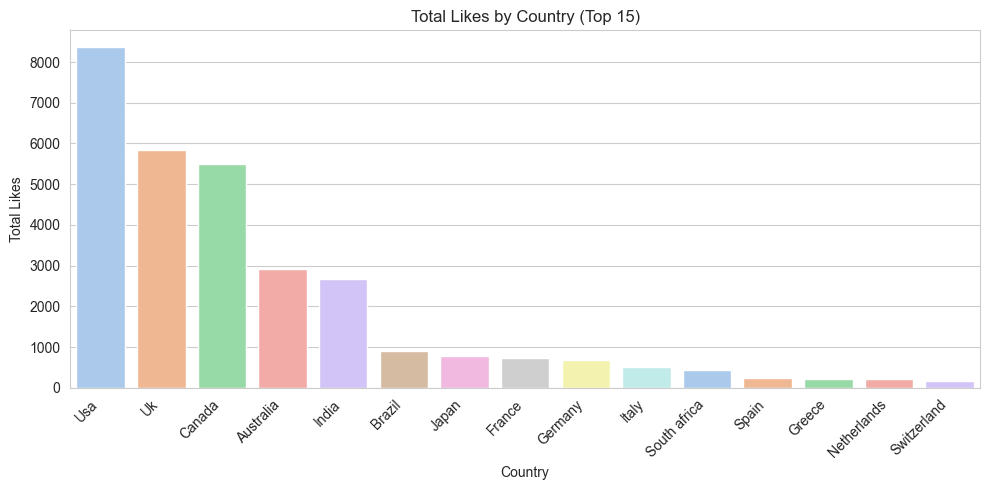

In [20]:
df['Country'] = df['Country'].str.strip().str.capitalize()
top_likes = df.groupby('Country')['Likes'].sum().nlargest(15).reset_index()

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=top_likes, x='Country', y='Likes',hue='Country', palette='pastel')
plt.title("Total Likes by Country (Top 15)")
plt.ylabel("Total Likes")
plt.xlabel("Country")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

<Axes: xlabel='Day'>

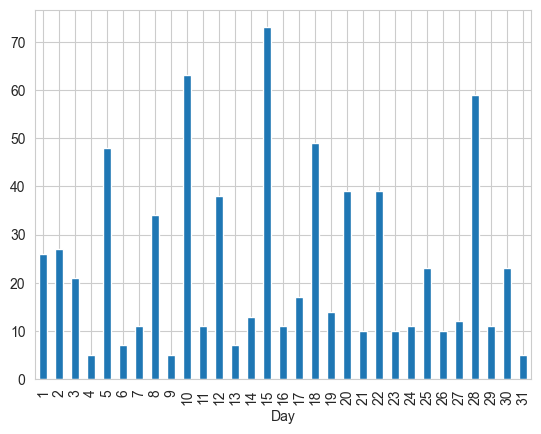

In [21]:
df['Day'].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='Year'>

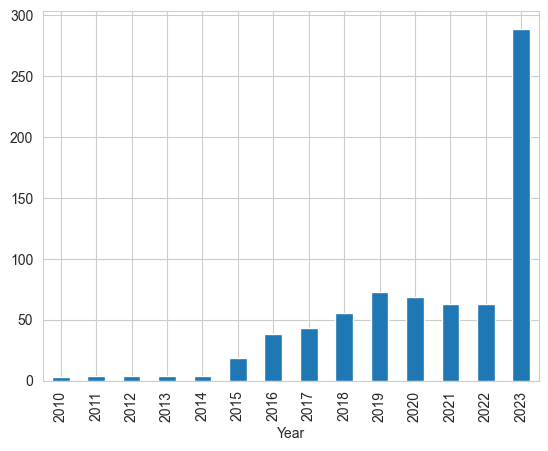

In [22]:
df['Year'].value_counts().sort_index().plot(kind='bar')

### Hypothesis

In [23]:
import scipy.stats as stats
import numpy as np

| Hypothesis No. | Hypothesis | Type | Expected Test |
|:--------------:|:-----------|:----|:-------------|
| H1 | Posts expressing Positive emotions receive significantly more likes than those expressing Negative emotions. | Two-sample comparison | t-test |
| H2 | Instagram posts receive more likes on average than Facebook posts. | Two-sample comparison | t-test |
| H3 | There is a positive correlation between the number of likes and retweets. | Correlation | Pearson/Spearman correlation |
| H4 | Engagement (likes) varies significantly across different hours of the day. | Multi-group comparison | One-way ANOVA |
| H5 | Engagement (likes) varies significantly by country. | Multi-group comparison | One-way ANOVA |


#### H1: Positive vs Negative Sentiment → Likes

In [24]:
df['Sentiment'] = df['Sentiment'].str.strip().str.lower()

print(df['Sentiment'].unique())

positive_sentiments = [
    'positive', 'happiness', 'joy', 'love', 'amusement', 'enjoyment', 
    'admiration', 'affection', 'awe', 'surprise', 'acceptance', 
    'adoration', 'anticipation', 'contentment', 'serenity', 'gratitude',
    'hope', 'enthusiasm', 'pride', 'excitement'
]

negative_sentiments = [
    'negative', 'anger', 'fear', 'sadness', 'disgust', 'despair', 
    'grief', 'loneliness', 'jealousy', 'resentment', 'frustration', 
    'boredom', 'anxiety', 'helplessness', 'regret', 'sorrow', 
    'isolation', 'betrayal', 'darkness', 'desperation'
]


['positive' 'negative' 'neutral' 'anger' 'fear' 'sadness' 'disgust'
 'happiness' 'joy' 'love' 'amusement' 'enjoyment' 'admiration' 'affection'
 'awe' 'disappointed' 'surprise' 'acceptance' 'adoration' 'anticipation'
 'bitter' 'calmness' 'confusion' 'excitement' 'kind' 'pride' 'shame'
 'elation' 'euphoria' 'contentment' 'serenity' 'gratitude' 'hope'
 'empowerment' 'compassion' 'tenderness' 'arousal' 'enthusiasm'
 'fulfillment' 'reverence' 'despair' 'grief' 'loneliness' 'jealousy'
 'resentment' 'frustration' 'boredom' 'anxiety' 'intimidation'
 'helplessness' 'envy' 'regret' 'curiosity' 'indifference' 'numbness'
 'melancholy' 'nostalgia' 'ambivalence' 'determination' 'zest' 'hopeful'
 'proud' 'grateful' 'empathetic' 'compassionate' 'playful' 'free-spirited'
 'inspired' 'confident' 'bitterness' 'yearning' 'fearful' 'apprehensive'
 'overwhelmed' 'jealous' 'devastated' 'frustrated' 'envious' 'dismissive'
 'thrill' 'bittersweet' 'overjoyed' 'inspiration' 'motivation'
 'contemplation' 'joyfulr

In [25]:
positive_likes = df[df['Sentiment'].isin(positive_sentiments)]['Likes'].dropna()
negative_likes = df[df['Sentiment'].isin(negative_sentiments)]['Likes'].dropna()

print(f"Positive Likes count: {len(positive_likes)}")
print(f"Negative Likes count: {len(negative_likes)}")

# Perform t-test
t_stat, p_value = stats.ttest_ind(positive_likes, negative_likes, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Significant difference: Positive sentiments get different likes compared to Negative.")
else:
    print("No significant difference found.")


Positive Likes count: 244
Negative Likes count: 81
T-statistic: 5.9966
P-value: 0.0000
Significant difference: Positive sentiments get different likes compared to Negative.


#### H2: Instagram vs Facebook → Likes

In [26]:
instagram_likes = df[df['Platform'] == 'Instagram']['Likes']
facebook_likes = df[df['Platform'] == 'Facebook']['Likes']

t_stat, p_value = stats.ttest_ind(instagram_likes, facebook_likes, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Significant difference: Instagram gets different likes compared to Facebook.")
else:
    print(" No significant difference found.")


T-statistic: 2.4997
P-value: 0.0128
Significant difference: Instagram gets different likes compared to Facebook.


#### H3: Likes vs Retweets Correlation

In [27]:
correlation, p_value = stats.pearsonr(df['Likes'], df['Retweets'])

print(f"Pearson correlation coefficient: {correlation:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Significant correlation between Likes and Retweets.")
else:
    print("No significant correlation found.")


Pearson correlation coefficient: 0.9985
P-value: 0.0000
Significant correlation between Likes and Retweets.


#### H4: Engagement Variance by Hour of Day (One-way ANOVA)

In [28]:
# Assuming you extracted 'Hour' column from Timestamp already
likes_by_hour = [group['Likes'].values for _, group in df.groupby('Hour')]

f_stat, p_value = stats.f_oneway(*likes_by_hour)

print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Significant difference in Likes across Hours of Day.")
else:
    print("No significant difference across Hours.")


F-statistic: 2.7013
P-value: 0.0001
Significant difference in Likes across Hours of Day.


#### H5: Engagement Variance by Country (One-way ANOVA)

In [29]:
likes_by_country = [group['Likes'].values for _, group in df.groupby('Country')]

f_stat, p_value = stats.f_oneway(*likes_by_country)

print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Significant difference in Likes across Countries.")
else:
    print("No significant difference across Countries.")


F-statistic: 3.3477
P-value: 0.0000
Significant difference in Likes across Countries.


### Initial Model Training and Interpretation

#### Predicting High Engagement (Classification Problem)

In [55]:
# Calculate median likes to calculate high engagement
# Assuming 'Likes' is the column for likes

median_likes = df['Likes'].median()

# Create a new target column
df['High_Engagement'] = (df['Likes'] > median_likes).astype(int)

# 1 = High Engagement
# 0 = Low Engagement


In [56]:
# Convert Timestamp to datetime (if not already)
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract hour
df['Hour'] = df['Timestamp'].dt.hour


In [57]:
# Use Label Encoding for Sentiment and Platform
from sklearn.preprocessing import LabelEncoder

le_sentiment = LabelEncoder()
le_platform = LabelEncoder()

df['Sentiment_encoded'] = le_sentiment.fit_transform(df['Sentiment'])
df['Platform_encoded'] = le_platform.fit_transform(df['Platform'])


In [58]:
features = ['Sentiment_encoded', 'Platform_encoded', 'Hour']
X = df[features]
y = df['High_Engagement']

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Logistic Regression (To Predict High Engagement)

In [60]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)


#### Random Forest Classifier

In [61]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

### Evaluate Models

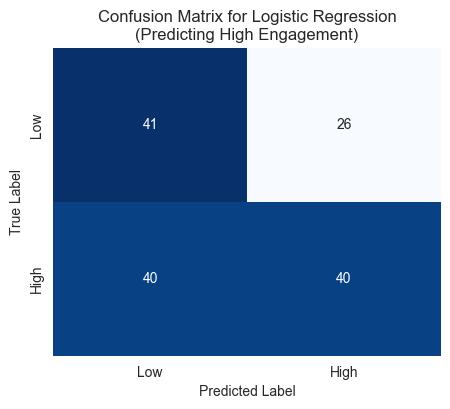

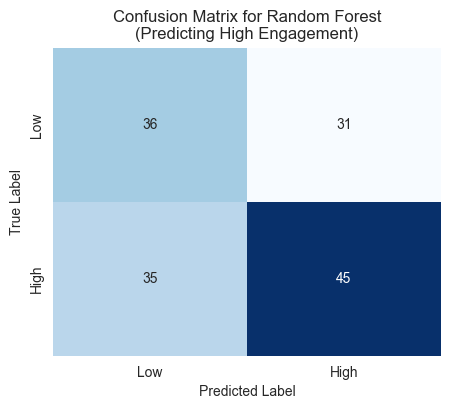


Model Performance Comparison (Predicting High Engagement):


,Model,Accuracy,Precision,Recall
0,Logistic Regression,0.55,0.61,0.50
1,Random Forest,0.55,0.59,0.56


In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", cbar=False)
    plt.title(f'Confusion Matrix for {model_name}\n(Predicting High Engagement)')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.xticks([0.5, 1.5], ["Low", "High"])
    plt.yticks([0.5, 1.5], ["Low", "High"])
    plt.show()

# Store metrics
metrics = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": []
}

# Logistic Regression
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
metrics["Model"].append("Logistic Regression")
metrics["Accuracy"].append(accuracy_score(y_test, y_pred_logreg))
metrics["Precision"].append(precision_score(y_test, y_pred_logreg))
metrics["Recall"].append(recall_score(y_test, y_pred_logreg))

# Plot confusion matrix
plot_confusion_matrix(cm_logreg, "Logistic Regression")

# Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
metrics["Model"].append("Random Forest")
metrics["Accuracy"].append(accuracy_score(y_test, y_pred_rf))
metrics["Precision"].append(precision_score(y_test, y_pred_rf))
metrics["Recall"].append(recall_score(y_test, y_pred_rf))

# Plot confusion matrix
plot_confusion_matrix(cm_rf, "Random Forest")

# Display model comparison
metrics_df = pd.DataFrame(metrics)
print("\nModel Performance Comparison (Predicting High Engagement):")
display(metrics_df.style.set_caption("Model Performance Metrics")
        .format({"Accuracy": "{:.2f}", "Precision": "{:.2f}", "Recall": "{:.2f}"}))

#### Importance (Higher importance = stronger influence on predicting engagement.)


Feature Importances (Random Forest):


,Feature,Importance
0,Sentiment_encoded,0.6915
2,Hour,0.2673
1,Platform_encoded,0.0412


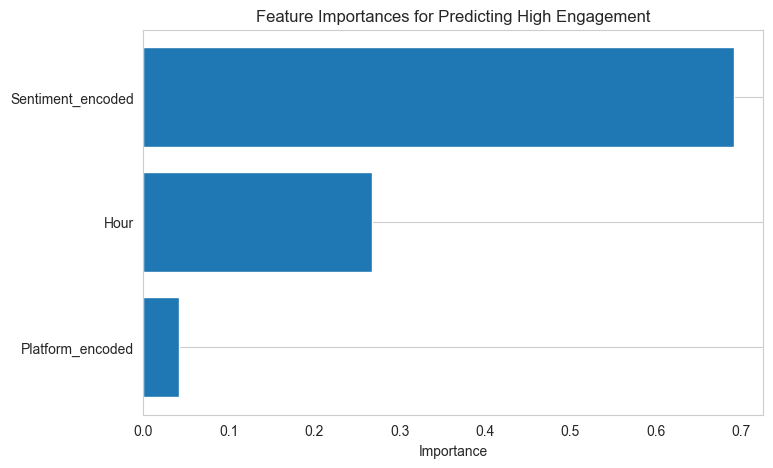

In [63]:
importances = rf.feature_importances_

# Create a DataFrame for easy viewing
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display the table
print("\nFeature Importances (Random Forest):")
display(feature_importance_df.style.format({'Importance': '{:.4f}'}))

# Plot
plt.figure(figsize=(8, 5))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.gca().invert_yaxis()  # Highest importance at the top
plt.xlabel('Importance')
plt.title('Feature Importances for Predicting High Engagement')
plt.grid(axis='x')
plt.show()

#### Predicting Likes on the basis of Sentiment and Platform (Regression Problem)

In [68]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

MAE: 9.809398135635732
R² Score: 0.12


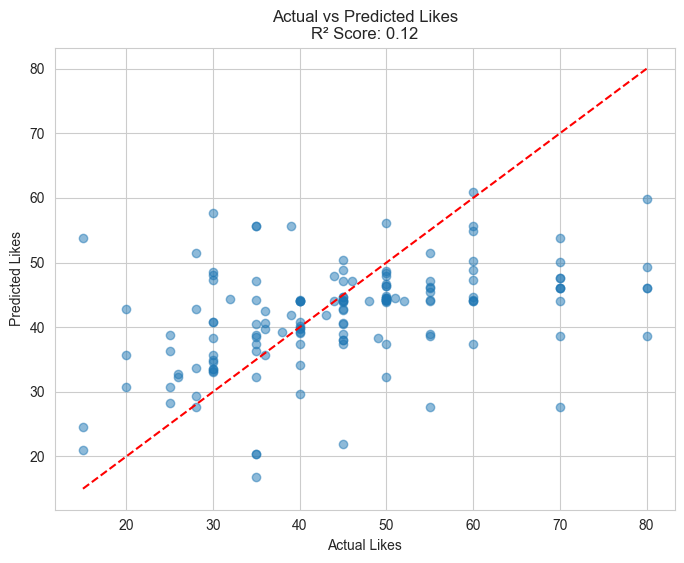

In [70]:
# Feature Engineering (only sentiment and platform)
X = pd.get_dummies(df[['Sentiment', 'Platform']])
y = df['Likes']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print('MAE:', mean_absolute_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2:.2f}')

# Scatter plot: Predicted vs Actual
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Reference line
plt.xlabel('Actual Likes')
plt.ylabel('Predicted Likes')
plt.title(f'Actual vs Predicted Likes\nR² Score: {r2:.2f}')

plt.grid(True)
plt.show()


##### Feature Importance in Regression here

We observe that posts expressing 'Wonder' and posted on 'Facebook' and 'Instagram' are among the top predictors of user engagement

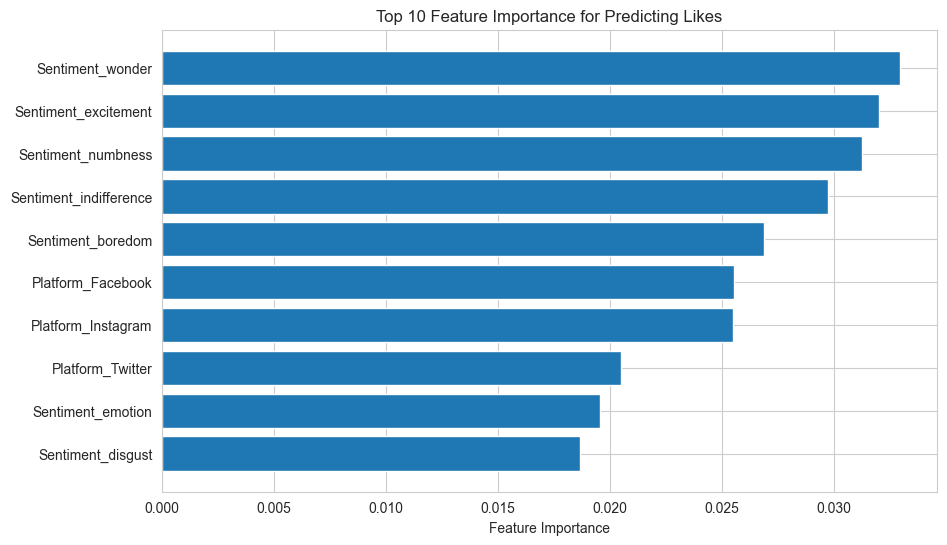

In [72]:
# Feature Importance
importances = model.feature_importances_
feature_names = X.columns

# Sort feature importances
sorted_idx = np.argsort(importances)[-10:]  # <-- Only Top 10 important features

plt.figure(figsize=(10,6))
plt.barh(range(len(sorted_idx)), importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importance for Predicting Likes')
plt.grid(True)
plt.show()


### Prediction error

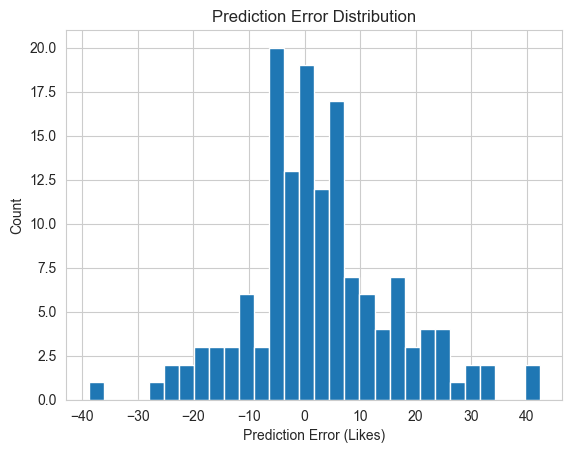

In [73]:
errors = y_test - y_pred
plt.hist(errors, bins=30)
plt.xlabel('Prediction Error (Likes)')
plt.ylabel('Count')
plt.title('Prediction Error Distribution')
plt.grid(True)
plt.show()
